In [1]:
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, concatenate
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.utils import plot_model

In [6]:
def inception_module(x, filter_1x1, filter_3x3_reduce, filter_3x3, filter_5x5_reduce, filter_5x5, filters_pool_proj,
                     name=None):
    # reduction layer
    conv_3x3_reducer = Conv2D(filters=filter_3x3_reduce, kernel_size=(1, 1), activation=relu, padding='same')(x)
    conv_5x5_reducer = Conv2D(filters=filter_5x5_reduce, kernel_size=(1, 1), activation=relu, padding='same')(x)
    pool_3x3 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)

    # extraction layer
    conv_3x3 = Conv2D(filters=filter_3x3, kernel_size=(3, 3), activation=relu, padding='same')(conv_3x3_reducer)
    conv_5x5 = Conv2D(filters=filter_5x5, kernel_size=(5, 5), activation=relu, padding='same')(conv_5x5_reducer)
    conv_1x1_proj = Conv2D(filters=filters_pool_proj, kernel_size=(1, 1), activation=relu, padding='same')(pool_3x3)

    # projection layer
    proj = Conv2D(filters=filter_1x1, kernel_size=(1, 1), activation=relu, padding='same')(x)

    # output
    x = concatenate([proj, conv_1x1_proj, conv_3x3, conv_5x5], axis=3, name=name)

    return x

In [9]:
input_layer = Input(shape=(56, 56, 3))

x = Conv2D(filters=64, kernel_size=(7,7),activation=relu,padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=192, kernel_size=(5,5), activation=relu,padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = inception_module(x,
                     filter_1x1=32,
                     filter_3x3_reduce=64,
                     filter_3x3=64,
                     filter_5x5_reduce=16,
                     filter_5x5=16,
                     filters_pool_proj=32,
                     name='inception_1a')
x = inception_module(x,
                     filter_1x1=64,
                     filter_3x3_reduce=128,
                     filter_3x3=128,
                     filter_5x5_reduce=32,
                     filter_5x5=32,
                     filters_pool_proj=64,
                     name='inception_1b')

exp_inception = Model(input_layer, x)
exp_inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 56, 56, 3)]  0           []                               
                                                                                                  
 conv2d_38 (Conv2D)             (None, 56, 56, 64)   9472        ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_13 (MaxPooling2D  (None, 28, 28, 64)  0           ['conv2d_38[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 28, 28, 192)  307392      ['max_pooling2d_13[0][0]'] 

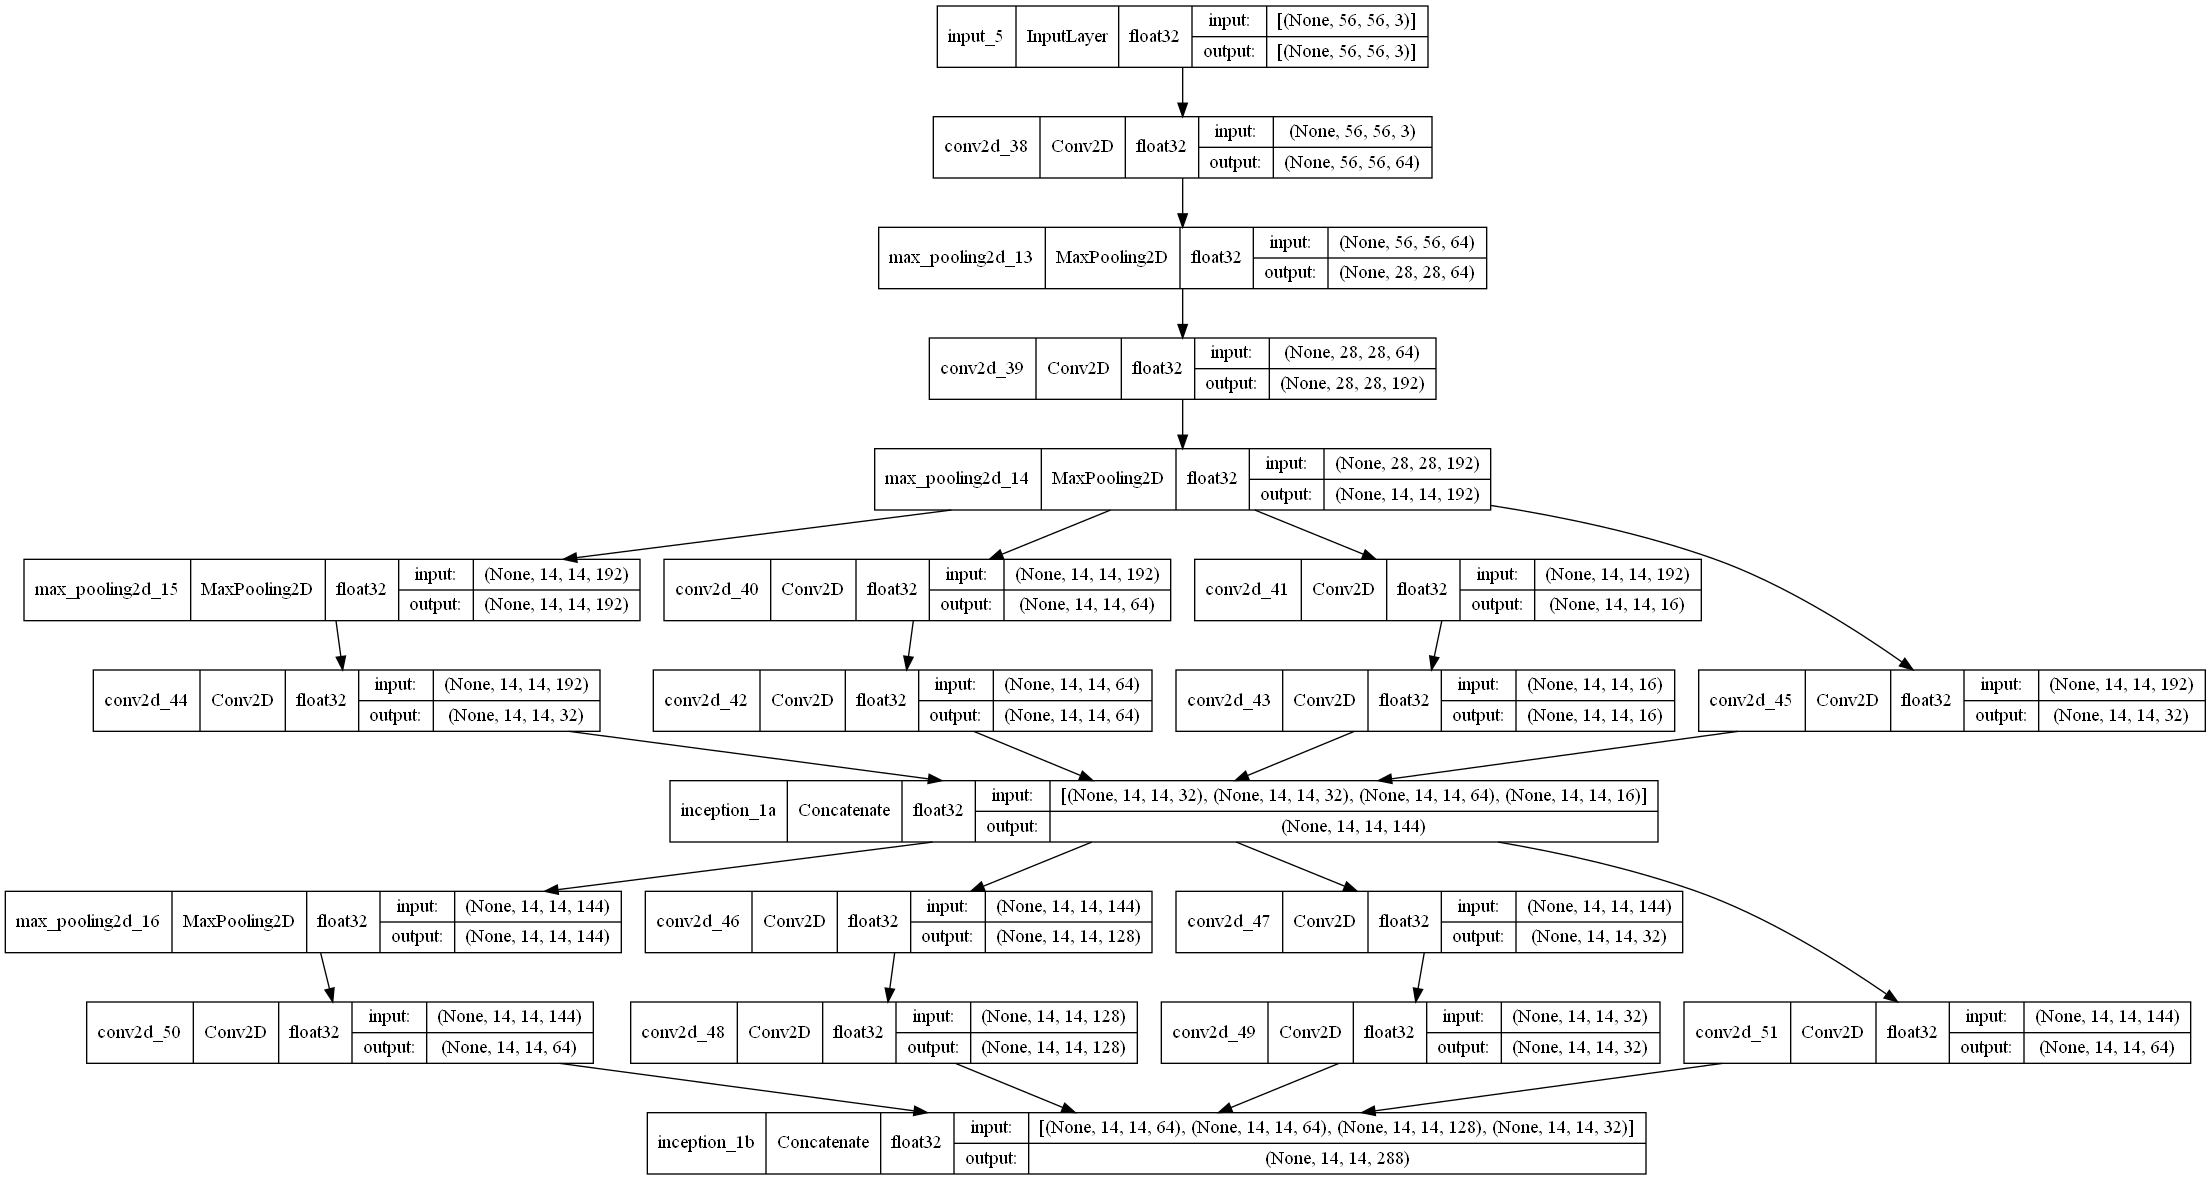

In [10]:
plot_model(exp_inception,
           to_file='inception module.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True)

In [ ]:
exp_input = Input(shape=(56,56,3))

# conv_5x5
x = Conv2D(filters=64, kernel_size=(7,7), )

exp_output

exp_conv = Model(exp_input, exp_output)